In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# LAB MODULE 5.
# Analysis of climate data
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# abbaimo parlato di diversi metodi per identificare pattern a livello spazio temporale nei nostri dati
# un esempio era l'utilizzo degli indici per rappresentare dei fenomi complessi, nel mod 4 avevamo visto l'analisi delle componenti principali applicata ad un dataset di tipo geospaziale. Un altro strumento menzionato sono le soms, una tipolgia di semplici reti neurali che può essere utilizzata per individuare dei pattern


# Topics covered:
# (1) Self Organizing Maps (SOMs)

# We will use the library "sompy":
# https://github.com/sevamoo/SOMPY

# Here are a couple of examples using sompy:
# https://gist.github.com/sevamoo/035c56e7428318dd3065013625f12a11
# https://www.linkedin.com/pulse/north-atlantic-winter-weather-regimes-from-map-perspective-yin

# We will use the same datasets of psl/ts from  Modules 3 & 4

In [2]:
# There some more SOM libraries, e.g.:
# S-SOM v1.0: A structural self-organizing map algorithm for weather typing 
#             https://zenodo.org/record/4437954
# SuSi: SUpervised Self-organIzing maps in Python
#       https://zenodo.org/record/5773988
# minisom : (well documented, author available on twitter)
#           https://github.com/JustGlowing/minisom/blob/master/examples/Iris.ipynb 
# neupy : Self-Organizing Feature Maps (SOFM or SOM)
# somoclu and SimpSOM

In [5]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

import cartopy.crs as ccrs

import sompy

ModuleNotFoundError: No module named 'sompy'

In [4]:
# Chose model

model = 'MRI-ESM2-0'   # MRI-ESM2-0 ; MIROC6 ; ACCESS-ESM1-5

In [5]:
#- Path to file

# sceglo le pressioni a livello del mare

modfile1=''.join(['./Mod4_lab/psl_Amon_',model,'_historical_r1i1p1f1_gn_185001-201412.nc'])

#- explore file
d1 = xr.open_dataset(modfile1)
d1

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 160, lon: 320, time: 1980)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat        (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon        (lon) float64 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    psl        (time, lat, lon) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-02-20T02:32:52Z
    data_specs_version:     01.00.29
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacella
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.MRI.MRI-ESM2...
    grid:                   native atmosphere TL159 gaussian grid (160x320 la...
    grid_label:             gn
    history:                2019-02-20T02:32:52Z ; CMOR rewrote data to be co...
    initialization_index:   1
    institution:            Meteorological Research Institute, Tsukuba, Ibara...
    institution_id:         MRI
    mip_era:                CMIP6
    nominal_resolution:     100 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       MRI-ESM2-0
    parent_time_units:      days since 1850-01-01
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  atmos
    source:                 MRI-ESM2.0 (2017): \naerosol: MASINGAR mk2r4 (TL9...
    source_id:              MRI-ESM2-0
    source_type:            AOGCM AER CHEM
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Amon
    table_info:             Creation Date:(14 December 2018) MD5:b2d32d1a0d9b...
    title:                  MRI-ESM2-0 output prepared for CMIP6
    variable_id:            psl
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MRI is licensed unde...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/36275bcc-884a-4960-b367-bd644a1fbb6b

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique'

findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTifinagh-Regular.ttf', name='Noto Sans Tifinagh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansVai-Regular.ttf', name='Noto Sans Vai', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Silom.ttf', name='Silom', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Phosphate.ttc', name='Phosphate', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Brush Script.ttf', name='Brush Script MT', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
f

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKaithi-Regular.ttf', name='Noto Sans Kaithi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Damascus.ttc', name='Damascus', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymReg.otf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuhid-Regular.ttf', name='Noto Sans Buhid', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Devanagari Sangam MN.ttc', name='Devanagari Sangam MN', style='normal', variant='normal', weight=400, stretch='norma

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansModi-Regular.ttf', name='Noto Sans Modi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Myanmar MN.ttc', name='Myanmar MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kokonor.ttf', name='Kokonor', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansKharoshthi-Regular.ttf', name='Noto Sans Kharoshthi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansJavanese-Regular.otf', name='Noto Sans Javanese', style='normal', variant='normal', weight=400, stretch='normal', 

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Italic.ttf', name='Arial', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 7.413636363636363
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Diwan Kufi.ttc', name='Diwan Kufi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Skia.ttf', name='Skia', style='normal', variant='normal', weight=5, stretch='normal', size='scalable')) = 10.42525
findfont: score(FontEntry(fname='/System/Library/Fonts/AppleSDGothicNeo.ttc', name='Apple SD Gothic Neo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLydian-Regular.ttf', name='Noto Sans Lydian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: sc

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleMyungjo.ttf', name='AppleMyungjo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGothic-Regular.ttf', name='Noto Sans Gothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Helvetica.ttc', name='Helvetica', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 7.322727272727273
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Rockwell.ttc', name='Rockwell', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PartyLET-plain.ttf', name='Party LET', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: sc

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymReg.otf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla Sangam MN.ttc', name='Bangla Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman Bold Italic.ttf', name='Times New Roman', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNewTaiLue-Regular.ttf', name='Noto Sans New Tai Lue', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Corsiva.ttc', name='Corsiva Hebrew', style='normal', variant='normal', weight=400

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSoraSompeng-Regular.ttf', name='Noto Sans Sora Sompeng', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMasaramGondi-Regular.otf', name='Noto Sans Masaram Gondi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni 72 OS.ttc', name='Bodoni 72 Oldstyle', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Apple Chancery.ttf', name='Apple Chancery', style='normal', variant='normal', weight=0, stretch='normal', size='scalable')) = 10.43
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Bold Italic.ttf', name='Arial Narrow', style='italic', variant='nor

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sana.ttc', name='Sana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMendeKikakui-Regular.ttf', name='Noto Sans Mende Kikakui', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBhaiksuki-Regular.ttf', name='Noto Sans Bhaiksuki', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow.ttf', name='Arial Narrow', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W2.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=250, stretch='normal', size='scalab

Entering env context: <fiona.env.Env object at 0x7fb2c383fc40>
Starting outermost env
No GDAL environment exists
New GDAL environment <fiona._env.GDALEnv object at 0x7fb2c383fcd0> created
Logging error handler pushed.
All drivers registered.
GDAL_DATA found in environment: '/opt/anaconda3/lib/python3.8/site-packages/fiona/gdal_data'.
PROJ_LIB found in environment: '/opt/anaconda3/share/proj'.
Started GDALEnv <fiona._env.GDALEnv object at 0x7fb2c383fcd0>.
Updated existing <fiona._env.GDALEnv object at 0x7fb2c383fcd0> with options {}
Entered env context: <fiona.env.Env object at 0x7fb2c383fc40>
Got a copy of environment <fiona._env.GDALEnv object at 0x7fb2c383fcd0> options
Credentialized: {'CHECK_WITH_INVERT_PROJ': True, 'GTIFF_IMPLICIT_JPEG_OVR': False, 'FIONA_ENV': True, 'GDAL_DATA': '/opt/anaconda3/lib/python3.8/site-packages/fiona/gdal_data'}
Exiting env context: <fiona.env.Env object at 0x7fb2c383fc40>
Cleared existing <fiona._env.GDALEnv object at 0x7fb2c383fcd0> options
Stopping G

findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/opt/anaconda3/

findfont: score(FontEntry(fname='/System/Library/Fonts/NewYorkItalic.ttf', name='.New York', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymBol.otf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Symbols.ttf', name='Apple Symbols', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Andale Mono.ttf', name='Andale Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansThaana-Regular.ttf', name='Noto Sans Thaana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(F

findfont: score(FontEntry(fname='/System/Library/Fonts/GeezaPro.ttc', name='Geeza Pro', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSiddham-Regular.ttf', name='Noto Sans Siddham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/SuperClarendon.ttc', name='Superclarendon', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/NotoNastaliq.ttc', name='Noto Nastaliq Urdu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Malayalam MN.ttc', name='Malayalam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(F

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLinearA-Regular.ttf', name='Noto Sans Linear A', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman.ttf', name='Times New Roman', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniIta.otf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Bold.ttf', name='Arial Narrow', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansArmenian.ttc', name='Noto Sans Armenian', style='normal', variant='normal', weight=900, stretch='normal', size

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVarBol.otf', name='STIXVariants', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpBol.otf', name='STIXIntegralsUp', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS Italic.ttf', name='Trebuchet MS', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldSouthArabian-Regular.ttf', name='Noto Sans Old South Arabian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=400, stretch='normal', si

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhagsPa-Regular.ttf', name='Noto Sans PhagsPa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Webdings.ttf', name='Webdings', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSerifYezidi-Regular.otf', name='Noto Serif Yezidi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/SFCompactItalic.ttf', name='.SF Compact', style='italic', variant='normal', weight=1000, stretch='normal', size='scalable')) = 11.62
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMandaic-Regular.ttf', name='Noto Sans Mandaic', style='normal', variant='normal', weight=400, stretch='normal', size='

findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W1.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=200, stretch='normal', size='scalable')) = 10.24
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBol.otf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil Sangam MN.ttc', name='Tamil Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Courier New.ttf', name='Courier New', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpSmReg.otf', name='STIXIntegralsUpSm', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfon

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni 72 Smallcaps Book.ttf', name='Bodoni 72 Smallcaps', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansWarangCiti-Regular.ttf', name='Noto Sans Warang Citi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Krungthep.ttf', name='Krungthep', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSyriac-Regular.ttf', name='Noto Sans Syriac', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma.ttf', name='Tahoma', style='normal', variant='normal', weight=400, stretch='normal'

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldPermic-Regular.ttf', name='Noto Sans Old Permic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/GujaratiMT.ttc', name='Gujarati MT', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc', name='Hiragino Maru Gothic Pro', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Outline 8 Dot.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Charter.ttc', name='Charter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10

findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sathu.ttf', name='Sathu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Avenir Next.ttc', name='Avenir Next', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Italic.ttf', name='Arial Narrow', style='italic', variant='normal', weight=400, stretch='condensed', size='scalable')) = 11.25
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Impact.ttf', name='Impact', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla MN.ttc', name='Bangla MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Libra

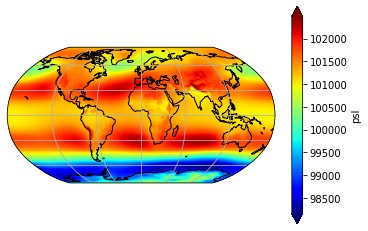

In [6]:
#- Make a visual check on time-averaged field

p0 = d1.psl.mean('time').plot(transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.Robinson()},
                            cmap='jet',extend='both')
p0.axes.coastlines()
p0.axes.gridlines()

In [ ]:
# basse pressioni relative all'eqautore, alte ai tropici

In [7]:
#- Extract subset of data

# ci focalizziamo su una particolare regione di interesse

# First verify coordinates
d1.coords['lon'] = (d1.coords['lon'] + 180) % 360 - 180
d1 = d1.sortby(d1.lon)

# (years, space) 
psljap = d1.psl.sel(time=slice('1950-01','2014-12'),  # scelgo un periodo di tempo
            lon=slice(-10,40), #(115,165),  # seleziono come area il giappone
            lat=slice(25,55)) #20,50))

# (season)
#psljap=psljap.sel(time=psljap.time.dt.season.isin(['DJF']))

# Change units 
psljap=psljap/100     #(Pa to hPa)

psljap

<xarray.DataArray 'psl' (time: 780, lat: 27, lon: 44)>
array([[[1022.6182 , 1022.924  , 1023.1453 , ..., 1018.91046,
         1019.30743, 1019.88837],
        [1023.31726, 1023.6121 , 1023.80444, ..., 1019.765  ,
         1020.378  , 1020.6841 ],
        [1023.96466, 1024.3063 , 1024.522  , ..., 1020.7569 ,
         1021.26135, 1021.49927],
        ...,
        [1008.97406, 1009.4545 , 1009.7968 , ..., 1014.58014,
         1014.47424, 1014.375  ],
        [1007.5925 , 1008.20917, 1008.5185 , ..., 1014.3082 ,
         1014.21674, 1014.14154],
        [1005.9568 , 1006.56525, 1006.97406, ..., 1013.9673 ,
         1013.9018 , 1013.8564 ]],

       [[1023.94055, 1024.5153 , 1025.0134 , ..., 1019.76385,
         1019.90314, 1020.051  ],
        [1025.0978 , 1025.6395 , 1026.0693 , ..., 1020.17487,
         1020.5199 , 1020.62836],
        [1026.2773 , 1026.8693 , 1027.2632 , ..., 1020.9063 ,
         1021.06995, 1021.1562 ],
...
        [1011.9074 , 1012.1852 , 1012.45514, ..., 1024.4667 ,
         1024.6996 , 1024.9663 ],
        [1009.5857 , 1009.9787 , 1010.22217, ..., 1023.7567 ,
         1024.0303 , 1024.3068 ],
        [1006.9872 , 1007.442  , 1007.7681 , ..., 1022.7191 ,
         1023.03455, 1023.3601 ]],

       [[1023.79083, 1023.8084 , 1023.76794, ..., 1019.0529 ,
         1019.9026 , 1021.1259 ],
        [1024.435  , 1024.4424 , 1024.3643 , ..., 1020.3418 ,
         1021.326  , 1022.2312 ],
        [1024.8687 , 1024.9485 , 1024.9619 , ..., 1022.06854,
         1022.8897 , 1023.43677],
        ...,
        [1008.2088 , 1008.66425, 1008.9945 , ..., 1021.3826 ,
         1021.19775, 1020.9944 ],
        [1006.7416 , 1007.3602 , 1007.73126, ..., 1020.8713 ,
         1020.73846, 1020.55835],
        [1004.94836, 1005.60956, 1006.1104 , ..., 1020.21014,
         1020.1546 , 1020.0706 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 25.23 26.36 27.48 28.6 ... 51.03 52.15 53.27 54.39
  * lon      (lon) float64 -9.0 -7.875 -6.75 -5.625 ... 36.0 37.12 38.25 39.38

In [ ]:
#- Make a visual check on time-averaged field

p0 = psljap.mean('time').plot(transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.Robinson()},
                            cmap='jet',extend='both')
p0.axes.coastlines()
p0.axes.gridlines()

locator: <matplotlib.ticker.AutoLocator object at 0x7fb2c42212b0>


Entering env context: <fiona.env.Env object at 0x7fb29c0efa60>
Starting outermost env
No GDAL environment exists
New GDAL environment <fiona._env.GDALEnv object at 0x7fb29c0efac0> created
Logging error handler pushed.
All drivers registered.
GDAL_DATA found in environment: '/opt/anaconda3/lib/python3.8/site-packages/fiona/gdal_data'.
PROJ_LIB found in environment: '/opt/anaconda3/share/proj'.
Started GDALEnv <fiona._env.GDALEnv object at 0x7fb29c0efac0>.
Updated existing <fiona._env.GDALEnv object at 0x7fb29c0efac0> with options {}
Entered env context: <fiona.env.Env object at 0x7fb29c0efa60>
Got a copy of environment <fiona._env.GDALEnv object at 0x7fb29c0efac0> options
Credentialized: {'CHECK_WITH_INVERT_PROJ': True, 'GTIFF_IMPLICIT_JPEG_OVR': False, 'FIONA_ENV': True, 'GDAL_DATA': '/opt/anaconda3/lib/python3.8/site-packages/fiona/gdal_data'}
Exiting env context: <fiona.env.Env object at 0x7fb29c0efa60>
Cleared existing <fiona._env.GDALEnv object at 0x7fb29c0efac0> options
Stopping G

Next index: 402
Next index: 403
Next index: 404
Next index: 405
Next index: 406
Next index: 407
Next index: 408
Next index: 409
Next index: 410
Next index: 411
Next index: 412
Next index: 413
Next index: 414
Next index: 415
Next index: 416
Next index: 417
Next index: 418
Next index: 419
Next index: 420
Next index: 421
Next index: 422
Next index: 423
Next index: 424
Next index: 425
Next index: 426
Next index: 427
Next index: 428
Next index: 429
Next index: 430
Next index: 431
Next index: 432
Next index: 433
Next index: 434
Next index: 435
Next index: 436
Next index: 437
Next index: 438
Next index: 439
Next index: 440
Next index: 441
Next index: 442
Next index: 443
Next index: 444
Next index: 445
Next index: 446
Next index: 447
Next index: 448
Next index: 449
Next index: 450
Next index: 451
Next index: 452
Next index: 453
Next index: 454
Next index: 455
Next index: 456
Next index: 457
Next index: 458
Next index: 459
Next index: 460
Next index: 461
Next index: 462
Next index: 463
Next ind

Next index: 915
Next index: 916
Next index: 917
Next index: 918
Next index: 919
Next index: 920
Next index: 921
Next index: 922
Next index: 923
Next index: 924
Next index: 925
Next index: 926
Next index: 927
Next index: 928
Next index: 929
Next index: 930
Next index: 931
Next index: 932
Next index: 933
Next index: 934
Next index: 935
Next index: 936
Next index: 937
Next index: 938
Next index: 939
Next index: 940
Next index: 941
Next index: 942
Next index: 943
Next index: 944
Next index: 945
Next index: 946
Next index: 947
Next index: 948
Next index: 949
Next index: 950
Next index: 951
Next index: 952
Next index: 953
Next index: 954
Next index: 955
Next index: 956
Next index: 957
Next index: 958
Next index: 959
Next index: 960
Next index: 961
Next index: 962
Next index: 963
Next index: 964
Next index: 965
Next index: 966
Next index: 967
Next index: 968
Next index: 969
Next index: 970
Next index: 971
Next index: 972
Next index: 973
Next index: 974
Next index: 975
Next index: 976
Next ind

In [ ]:
# vediamo apputno l'area del giappone (se non appare usare coordinate sopra che sono commentate)

In [ ]:
# operazioni per passare i dati alla libreria sompy
# la rete neurale vuole in input degli array mono dimensionali

# Check mean and std for annual and seasonal aggregation levels

fig = plt.figure(figsize=(16,16))  # figsize=(x,y)

nr=2  # number of rows
nc=5  # number of columns
ii=0  # initialize positional index

gs = mpl.gridspec.GridSpec(nr,nc)

                 

In [ ]:
#- Store info on size of dimensions

nt,ny,nx = psljap.shape
psljap.shape

In [ ]:
iput2d = np.array(psljap)  # creo un array

In [ ]:
iput1d = iput2d.reshape(iput2d.shape[0],-1)
iput1d

In [ ]:
# Define SOM map size (should be NxN)

NN = 2

mapsize = [NN,NN] #[4] #[4,1] # dimensione della mappe

# Next define the settings for the SOM NN structure

# NOTE
# Using "normalization=None" works, but later when issuing "som.cluster(4)" this raises an error:
#   AttributeError: 'NoneType' object has no attribute 'denormalize_by'
# Better use "normalization='var'" and store mean & std to denormalize ourselves when needed

#som = sompy.SOMFactory.build(iput1d, mapsize, mask=None, mapshape='planar', lattice='rect', 
#                             normalization=None, initialization='pca', neighborhood='gaussian', 
#                             training='batch', name='sompy')  

som = sompy.SOMFactory.build(iput1d, mapsize, mask=None, mapshape='planar', lattice='rect', 
                             normalization='var', initialization='pca', neighborhood='gaussian', 
                             training='batch', name='sompy')  

# this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')  # verbose='debug' / 'info' / None


# Store mean and std
ds2x_avg=psljap.mean('time')
ds2x_std=psljap.std('time')
#ds1_avg=iput1d.mean()
#ds1_std=iput1d.std()

# vogliamo usare queste soams per trovare dei pattern che si ripetono

In [ ]:
# Now plot

codebook =  som.codebook.matrix

norm = mpl.colors.Normalize(vmin=codebook.min(),vmax=codebook.max()) 
x,y = np.meshgrid(psljap.lon, psljap.lat)

fig, axes = plt.subplots(NN,NN, #figsize=(16,4), 
                         subplot_kw=dict(projection=ccrs.LambertConformal(
                         central_longitude=float((psljap.lon.min()+psljap.lon.max())/2) ))) 

print((psljap.lon.min()+psljap.lon.max())/2)

for i in range(som.codebook.nnodes):
    onecen = codebook[i,:].reshape(ny,nx, order='C')
    cs = axes.flat[i].pcolormesh(x, y, onecen, 
                               transform=ccrs.PlateCarree(),
                               cmap='jet', norm=norm)
    axes.flat[i].set_title(' '.join(["Regime n.",str(i)]))
    axes.flat[i].coastlines()    
    #axes.flat[i].gridlines(draw_labels=True)

cbar_ax = fig.add_axes([0.28, 0.08, 0.46, 0.02]) #[left, bottom, width, height]
cbar = fig.colorbar(cs, cax=cbar_ax, extend='both', orientation='horizontal')    
cbar.set_label('hPa')
    
fig.tight_layout(pad=3)

# 4 regimi che sono stati identificati, sono degli eventi tipici o pattern identificati dalla rete neurale, sono anomlie rispetto alla situazione base del primo plot in cui si vede il giappone

In [ ]:
# Visualize number of hits for each regime


# vediamo i regimi più frequenti



from sompy.visualization.bmuhits import BmuHitsView

vhts  = BmuHitsView(NN, NN, "Amount of each regime",text_size=12)
vhts.show(som, anotate=True, onlyzeros=False, labelsize=12, cmap="jet", logaritmic=False)

In [ ]:
# Define number of clusters to organize the initial NN*NN SOMs

NC=NN*NN

from sompy.visualization.hitmap import HitMapView

crm = som.cluster(NC) ; print(crm)

hits = HitMapView(NN,NN,"Weather regimes clustering",text_size=12)
a = hits.show(som)


In [ ]:
# To map grid cluster labels back to original data

map_labels = som.cluster(n_clusters=NC)
data_labels = np.array([map_labels[int(k)] for k in som._bmu[0]]) # mapping labels from grid to original data

print(np.shape(som._bmu))
print(len(data_labels))

data_labels

In [ ]:
# Plot all ?

pa = -1  #  pa <= 0 : NO // pa > 1 : YES


norm2 = mpl.colors.Normalize(vmin=psljap.min(),vmax=psljap.max()) 


if (pa > 0):

 fig, axes = plt.subplots(nrows=int(len(data_labels)/4), ncols=4, figsize=(12,int(len(data_labels)/2)), 
                         subplot_kw=dict(projection=ccrs.LambertConformal(
                         central_longitude=float((psljap.lon.min()+psljap.lon.max())/2) ))) 

 for i in range(len(data_labels)):
    cs = axes.flat[i].pcolormesh(psljap.lon, psljap.lat, psljap[i], 
                               transform=ccrs.PlateCarree(),
                               cmap='jet', norm=norm2)
    axes.flat[i].coastlines()    
    axes.flat[i].set_title('th cluster ; month='.join([str(data_labels[i]),
                                                       str(np.asarray(psljap.time.dt.month)[i])]))

 fig.tight_layout(pad=3)

In [ ]:
# Put data_labels into a new xarray DataArray

regimes=xr.DataArray(data=data_labels, dims=["time"],
                     coords=dict(time=psljap.time))

regimes

In [ ]:
# Plot mean & std maps to provide context for the following interpretation of SOMs

fig = plt.figure(figsize=(11,4))  # figsize=(x,y)
gs = mpl.gridspec.GridSpec(1,2) # (rows,cols)

norm_avg = mpl.colors.Normalize(vmin=ds2x_avg.min()*0.995,vmax=ds2x_avg.max()*1.005) 

# avg
ax = fig.add_subplot(gs[0],projection=ccrs.LambertConformal(
                         central_longitude=float((psljap.lon.min()+psljap.lon.max())/2)))

rr1 = ax.pcolormesh(psljap.lon, psljap.lat, ds2x_avg, 
                               transform=ccrs.PlateCarree(),
                               cmap='jet', norm=norm_avg)
ax.set_title('AVERAGE')
ax.coastlines()    

# std
ax = fig.add_subplot(gs[1],projection=ccrs.LambertConformal(
                         central_longitude=float((psljap.lon.min()+psljap.lon.max())/2)))

rr2 = ax.pcolormesh(psljap.lon, psljap.lat, ds2x_std, 
                               transform=ccrs.PlateCarree(),
                               cmap='jet')#, norm=norm2)
ax.set_title('STD')
ax.coastlines()    

cbar_ax = fig.add_axes([0.15, 0.08, 0.3, 0.03]) #[left, bottom, width, height]
cbar = fig.colorbar(rr1, cax=cbar_ax, extend='both', orientation='horizontal')    
cbar.set_label('hPa')

cbar_ax = fig.add_axes([0.57, 0.08, 0.3, 0.03]) #[left, bottom, width, height]
cbar = fig.colorbar(rr2, cax=cbar_ax, extend='both', orientation='horizontal')    
cbar.set_label('hPa')



In [ ]:
# Plot for each cluster a few random examples and a histogram showing the distribution for the 
#   differnt months of the year

# plottare per ciascun cluster un instogramma e alcuni esempi

fig = plt.figure(figsize=(16,int(NC*2.5)))  # figsize=(x,y)

nr=len(set(data_labels))  # number of rows
nc=5  # number of columns
ii=0  # initialize positional index

gs = mpl.gridspec.GridSpec(nr,nc)
months=np.array(list(range(1,14))) #; print(months)

for cc in set(data_labels):

    # Cluster ordering is not the same as regimes order; here I re-align them 
    # Also, the number of regimes may not be the same as the number of regimes' clusters
    
    c=crm[cc]
    print(c,cc)

    
    # First, print the regime's typical map (the first regime in case #regimes != #clusters)
    
    ax = fig.add_subplot(gs[ii],projection=ccrs.LambertConformal(
                         central_longitude=float((psljap.lon.min()+psljap.lon.max())/2)))
    onecen = codebook[cc,:].reshape(ny,nx, order='C')
    cs = ax.pcolormesh(x, y, (onecen*1)+0, 
                               transform=ccrs.PlateCarree(),
                               cmap='jet', norm=norm)
    ax.set_title(' '.join(["Regime n.",str(cc)]))
    ax.coastlines()    
    ii += 1
 

    # Second, add a histogram showing the months of occurrence of the current regime
    # Third, select and plot a few random maps for each regime
    # Check whether a regime type is actually populated
    
    if (len(regimes[regimes==c])>0):

      # 2 : add histogram
    
      ax = fig.add_subplot(gs[ii])
      regimes[regimes==c].time.dt.month.plot.hist(ax=ax,bins=months,align='left')
      ii += 1

      # 3 : add random maps from regimes' cluster
        
      indx = np.where(regimes==c)[0] #; print(indx,len(indx))
    
      rindx = np.random.randint(len(indx), size=3) #; print(rindx)
      rmap = psljap[indx[rindx]]

      for fi, f in enumerate(rmap):
        ax = fig.add_subplot(gs[ii],projection=ccrs.LambertConformal(
                         central_longitude=float((psljap.lon.min()+psljap.lon.max())/2)))
        rr = ax.pcolormesh(psljap.lon, psljap.lat, rmap[fi], 
                               transform=ccrs.PlateCarree(),
                               cmap='jet', norm=norm_avg)
        ax.set_title(rmap[fi].time.dt.strftime('%b %Y').values)
        ax.coastlines()    
        ii += 1
       
    else:
 
      ii += 4
     
    
cbar_ax = fig.add_axes([0.12, 0.08, 0.14, 0.02]) #[left, bottom, width, height]
cbar = fig.colorbar(cs, cax=cbar_ax, extend='both', orientation='horizontal')    
cbar.set_label('hPa')

cbar_ax = fig.add_axes([0.45, 0.08, 0.45, 0.02]) #[left, bottom, width, height]
cbar = fig.colorbar(rr, cax=cbar_ax, extend='both', orientation='horizontal')    
cbar.set_label('hPa')

plt.subplots_adjust(hspace = 0.7)    
fig.tight_layout()    

In [ ]:
 # vediamo una distribuzione stagionale, due regimi per mesi estivi e due per mesi invernali
# nella cartina di sx abbiamo le anomalie di pressione e nei tre grafici a destra i valori di pressioni

In [ ]:
# riassumendo: abbiamo una rete neurale, definiamo un numero di nodi o pattern che vogliamo andare a vedere, si fa una inizializzazione